In [110]:
import pandas as pd
apartment_data = pd.read_csv('apartment_cleaned.csv')  
apartment_data.head()

,Unnamed: 0.1,Unnamed: 0,Rooms,Residential complex,City,District,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Housing class,Material
0,0,0,4-комнатной,Anar,г. Астана,Есильский район,ул. Орынбор 13,127 м²,75 000 000,590 551,2023,Сдан,Комфорт,Кирпичные
1,1,1,2-комнатной,Garden View,г. Астана,Есильский район,ул. Бухар жырау 26 стр,47.68 м²,43 950 000,921 770,2024,Не сдан,Бизнес+,Монолитные
2,2,2,3-комнатной,Самрук Towers,г. Астана,Нура район,ул. Кайыма Мухамедханова 17,86 м²,38 000 000,441 860,2018,Сдан,Эконом,Монолитные
3,3,3,1-комнатной,GreenLine.Headliner,г. Астана,Есильский район,ул. Толе би 50,45 м²,37 500 000,833 333,2022,Не сдан,Бизнес,Unknown
4,4,4,2-комнатной,GreenLine.Flora,г. Астана,Есильский район,ул. Е 900 4,50.1 м²,35 500 000,708 583,2024,Не сдан,Бизнес,Монолитные


In [7]:
apartment_data.isna().sum()

Unnamed: 0.1                     0
Unnamed: 0                       0
Rooms                            0
Residential complex              0
City                             0
District                         0
Address                          0
Apartment area                   0
Price                            0
Price/m2                         0
Year                             0
Commissioned/not commissioned    0
Housing class                    0
Material                         0
dtype: int64

In [17]:
apartment_data = apartment_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')  
apartment_data.head()

,Rooms,Residential complex,City,District,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Housing class,Material
0,4-комнатной,Anar,г. Астана,Есильский район,ул. Орынбор 13,127 м²,75 000 000,590 551,2023,Сдан,Комфорт,Кирпичные
1,2-комнатной,Garden View,г. Астана,Есильский район,ул. Бухар жырау 26 стр,47.68 м²,43 950 000,921 770,2024,Не сдан,Бизнес+,Монолитные
2,3-комнатной,Самрук Towers,г. Астана,Нура район,ул. Кайыма Мухамедханова 17,86 м²,38 000 000,441 860,2018,Сдан,Эконом,Монолитные
3,1-комнатной,GreenLine.Headliner,г. Астана,Есильский район,ул. Толе би 50,45 м²,37 500 000,833 333,2022,Не сдан,Бизнес,Unknown
4,2-комнатной,GreenLine.Flora,г. Астана,Есильский район,ул. Е 900 4,50.1 м²,35 500 000,708 583,2024,Не сдан,Бизнес,Монолитные


In [111]:
apartment_data.dtypes

Unnamed: 0.1                      int64
Unnamed: 0                        int64
Rooms                            object
Residential complex              object
City                             object
District                         object
Address                          object
Apartment area                   object
Price                            object
Price/m2                         object
Year                              int64
Commissioned/not commissioned    object
Housing class                    object
Material                         object
dtype: object

In [24]:
apartment_data['Apartment area'] = apartment_data['Apartment area'].astype(str)

apartment_data['Apartment area'] = apartment_data['Apartment area'].str.replace(' м²', '', regex=False).astype(float)

apartment_data['Price'] = apartment_data['Price'].str.replace(' ', '').astype(float)
apartment_data['Price/m2'] = apartment_data['Price/m2'].str.replace(' ', '').astype(float)

print(apartment_data[['Apartment area', 'Price', 'Price/m2']].head())

   Apartment area       Price  Price/m2
0          127.00  75000000.0  590551.0
1           47.68  43950000.0  921770.0
2           86.00  38000000.0  441860.0
3           45.00  37500000.0  833333.0
4           50.10  35500000.0  708583.0


In [27]:
district_avg_price = apartment_data.groupby('District')['Price'].transform('mean')
apartment_data['Price Deviation from District'] = apartment_data['Price'] - district_avg_price

apartment_data['Apartment Size Category'] = pd.cut(
    apartment_data['Apartment area'],
    bins=[0, 40, 70, 100, 150, float('inf')],
    labels=['Very Small', 'Small', 'Medium', 'Large', 'Very Large']
)
apartment_data.head()

,Rooms,Residential complex,City,District,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Housing class,Material,Price Deviation from District,Apartment Size Category
0,4-комнатной,Anar,г. Астана,Есильский район,ул. Орынбор 13,127.00,75000000.0,590551.0,2023,Сдан,Комфорт,Кирпичные,4.065711e+07,Large
1,2-комнатной,Garden View,г. Астана,Есильский район,ул. Бухар жырау 26 стр,47.68,43950000.0,921770.0,2024,Не сдан,Бизнес+,Монолитные,9.607114e+06,Small
2,3-комнатной,Самрук Towers,г. Астана,Нура район,ул. Кайыма Мухамедханова 17,86.00,38000000.0,441860.0,2018,Сдан,Эконом,Монолитные,0.000000e+00,Medium
3,1-комнатной,GreenLine.Headliner,г. Астана,Есильский район,ул. Толе би 50,45.00,37500000.0,833333.0,2022,Не сдан,Бизнес,Unknown,3.157114e+06,Small
4,2-комнатной,GreenLine.Flora,г. Астана,Есильский район,ул. Е 900 4,50.10,35500000.0,708583.0,2024,Не сдан,Бизнес,Монолитные,1.157114e+06,Small


In [57]:
district_encoded = pd.get_dummies(apartment_data['District'], prefix='District')
housing_class_encoded = pd.get_dummies(apartment_data['Housing class'], prefix='HousingClass')

apartment_data = pd.concat([apartment_data, district_encoded, housing_class_encoded], axis=1)

apartment_data = apartment_data.drop(columns=['District', 'Housing class'], errors='ignore')

apartment_data.head()

,Rooms,Residential complex,City,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Material,...,District_Нура район,District_ул. Бухар жырау,District_ул. Т. Рыскулова,District_ул. Туран 57/7,District_ул. Улы дала,HousingClass_Бизнес,HousingClass_Бизнес+,HousingClass_Комфорт,HousingClass_Комфорт+,HousingClass_Эконом
0,4-комнатной,Anar,г. Астана,ул. Орынбор 13,127.00,75000000.0,590551.0,2023,Сдан,Кирпичные,...,0,0,0,0,0,0,0,1,0,0
1,2-комнатной,Garden View,г. Астана,ул. Бухар жырау 26 стр,47.68,43950000.0,921770.0,2024,Не сдан,Монолитные,...,0,0,0,0,0,0,1,0,0,0
2,3-комнатной,Самрук Towers,г. Астана,ул. Кайыма Мухамедханова 17,86.00,38000000.0,441860.0,2018,Сдан,Монолитные,...,1,0,0,0,0,0,0,0,0,1
3,1-комнатной,GreenLine.Headliner,г. Астана,ул. Толе би 50,45.00,37500000.0,833333.0,2022,Не сдан,Unknown,...,0,0,0,0,0,1,0,0,0,0
4,2-комнатной,GreenLine.Flora,г. Астана,ул. Е 900 4,50.10,35500000.0,708583.0,2024,Не сдан,Монолитные,...,0,0,0,0,0,1,0,0,0,0


In [67]:
apartment_data['Rooms'] = apartment_data['Rooms'].astype(str)

apartment_data['Rooms'] = apartment_data['Rooms'].str.extract('(\d+)').astype(float).astype(int)
apartment_data['Rooms'].head()

0    4
1    2
2    3
3    1
4    2
Name: Rooms, dtype: int32

In [73]:
apartment_data['Commissioned/not commissioned'] = apartment_data['Commissioned/not commissioned'].map({
    'Сдан': 1,
    'Не сдан': 0
})
apartment_data.head()

,Rooms,Residential complex,City,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Material,...,District_Нура район,District_ул. Бухар жырау,District_ул. Т. Рыскулова,District_ул. Туран 57/7,District_ул. Улы дала,HousingClass_Бизнес,HousingClass_Бизнес+,HousingClass_Комфорт,HousingClass_Комфорт+,HousingClass_Эконом
0,4,Anar,г. Астана,ул. Орынбор 13,127.00,75000000.0,590551.0,2023,1,Кирпичные,...,0,0,0,0,0,0,0,1,0,0
1,2,Garden View,г. Астана,ул. Бухар жырау 26 стр,47.68,43950000.0,921770.0,2024,0,Монолитные,...,0,0,0,0,0,0,1,0,0,0
2,3,Самрук Towers,г. Астана,ул. Кайыма Мухамедханова 17,86.00,38000000.0,441860.0,2018,1,Монолитные,...,1,0,0,0,0,0,0,0,0,1
3,1,GreenLine.Headliner,г. Астана,ул. Толе би 50,45.00,37500000.0,833333.0,2022,0,Unknown,...,0,0,0,0,0,1,0,0,0,0
4,2,GreenLine.Flora,г. Астана,ул. Е 900 4,50.10,35500000.0,708583.0,2024,0,Монолитные,...,0,0,0,0,0,1,0,0,0,0


In [74]:
apartment_data.dtypes

Rooms                               int32
Residential complex                object
City                               object
Address                            object
Apartment area                    float64
Price                             float64
Price/m2                          float64
Year                                int64
Commissioned/not commissioned       int64
Material                           object
Price Deviation from District     float64
Apartment Size Category          category
District_Есильский район            uint8
District_Есильский район 15         uint8
District_Есильский район 18         uint8
District_Нура район                 uint8
District_ул. Бухар жырау            uint8
District_ул. Т. Рыскулова           uint8
District_ул. Туран 57/7             uint8
District_ул. Улы дала               uint8
HousingClass_Бизнес                 uint8
HousingClass_Бизнес+                uint8
HousingClass_Комфорт                uint8
HousingClass_Комфорт+             

In [82]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

apartment_data[['Price', 'Price/m2', 'Apartment area']] = scaler.fit_transform(apartment_data[['Price', 'Price/m2', 'Apartment area']])
apartment_data.head()

,Rooms,Residential complex,City,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Material,...,District_Нура район,District_ул. Бухар жырау,District_ул. Т. Рыскулова,District_ул. Туран 57/7,District_ул. Улы дала,HousingClass_Бизнес,HousingClass_Бизнес+,HousingClass_Комфорт,HousingClass_Комфорт+,HousingClass_Эконом
0,4,Anar,г. Астана,ул. Орынбор 13,0.628605,0.546425,0.424737,2023,1,Кирпичные,...,0,0,0,0,0,0,0,1,0,0
1,2,Garden View,г. Астана,ул. Бухар жырау 26 стр,0.103863,0.262112,1.000000,2024,0,Монолитные,...,0,0,0,0,0,0,1,0,0,0
2,3,Самрук Towers,г. Астана,ул. Кайыма Мухамедханова 17,0.357370,0.207630,0.166490,2018,1,Монолитные,...,1,0,0,0,0,0,0,0,0,1
3,1,GreenLine.Headliner,г. Астана,ул. Толе би 50,0.086134,0.203052,0.846402,2022,0,Unknown,...,0,0,0,0,0,1,0,0,0,0
4,2,GreenLine.Flora,г. Астана,ул. Е 900 4,0.119873,0.184739,0.629736,2024,0,Монолитные,...,0,0,0,0,0,1,0,0,0,0


In [83]:
apartment_data.to_csv('apartment_processed.csv', index=False)

In [133]:
dtype_dict = {
    'Rooms': int,
    'Apartment area': float,
    'Price': float,
    'Price/m2': float,
    'Commissioned/not commissioned': int
}
data = pd.read_csv('apartment_processed.csv', dtype=dtype_dict)

In [134]:
data.head()

,Rooms,Residential complex,City,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Material,...,District_Нура район,District_ул. Бухар жырау,District_ул. Т. Рыскулова,District_ул. Туран 57/7,District_ул. Улы дала,HousingClass_Бизнес,HousingClass_Бизнес+,HousingClass_Комфорт,HousingClass_Комфорт+,HousingClass_Эконом
0,4,Anar,г. Астана,ул. Орынбор 13,0.628605,0.546425,0.424737,2023,1,Кирпичные,...,0,0,0,0,0,0,0,1,0,0
1,2,Garden View,г. Астана,ул. Бухар жырау 26 стр,0.103863,0.262112,1.000000,2024,0,Монолитные,...,0,0,0,0,0,0,1,0,0,0
2,3,Самрук Towers,г. Астана,ул. Кайыма Мухамедханова 17,0.357370,0.207630,0.166490,2018,1,Монолитные,...,1,0,0,0,0,0,0,0,0,1
3,1,GreenLine.Headliner,г. Астана,ул. Толе би 50,0.086134,0.203052,0.846402,2022,0,Unknown,...,0,0,0,0,0,1,0,0,0,0
4,2,GreenLine.Flora,г. Астана,ул. Е 900 4,0.119873,0.184739,0.629736,2024,0,Монолитные,...,0,0,0,0,0,1,0,0,0,0


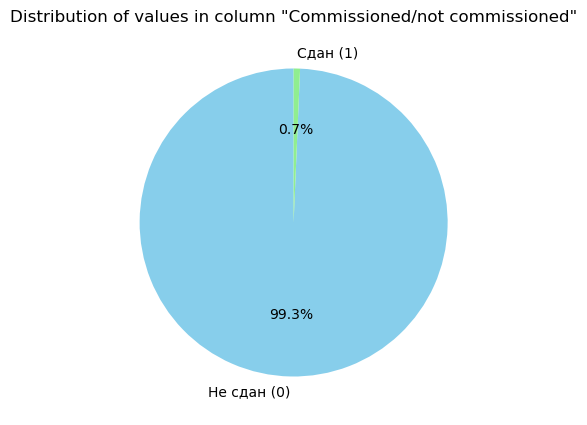

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (7, 5))
data['Commissioned/not commissioned'].value_counts().plot.pie(
    autopct = '%1.1f%%', 
    colors = ['skyblue', 'lightgreen'], 
    labels = ['Не сдан (0)', 'Сдан (1)'], 
    startangle = 90
)
plt.title('Distribution of values in column "Commissioned/not commissioned"')
plt.ylabel('')  
plt.show()

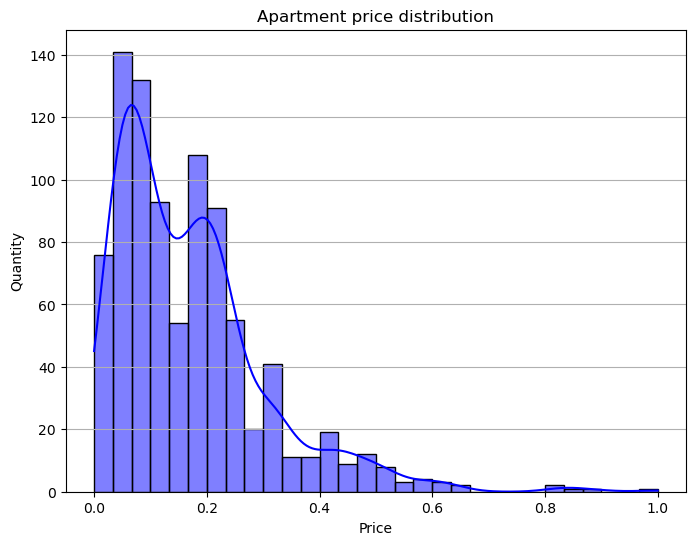

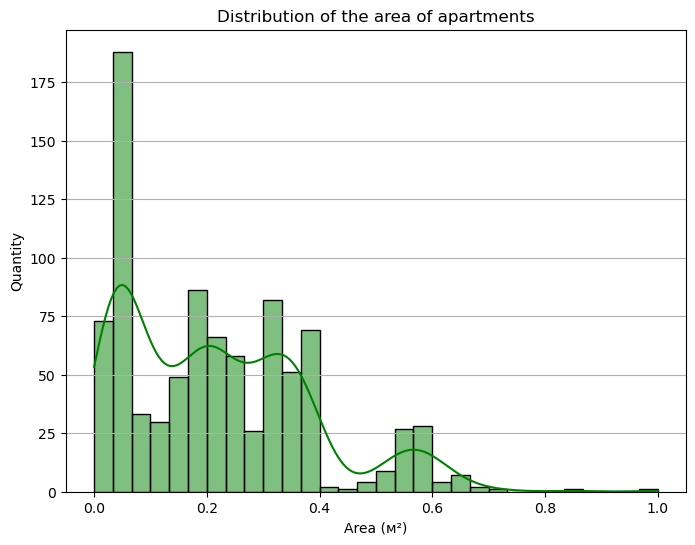

In [136]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Price'], bins = 30, kde = True, color = 'blue')
plt.title('Apartment price distribution')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.grid(axis='y')
plt.show()

plt.figure(figsize = (8, 6))
sns.histplot(data['Apartment area'], bins = 30, kde = True, color = 'green')
plt.title('Distribution of the area of apartments')
plt.xlabel('Area (м²)')
plt.ylabel('Quantity')
plt.grid(axis = 'y')
plt.show()

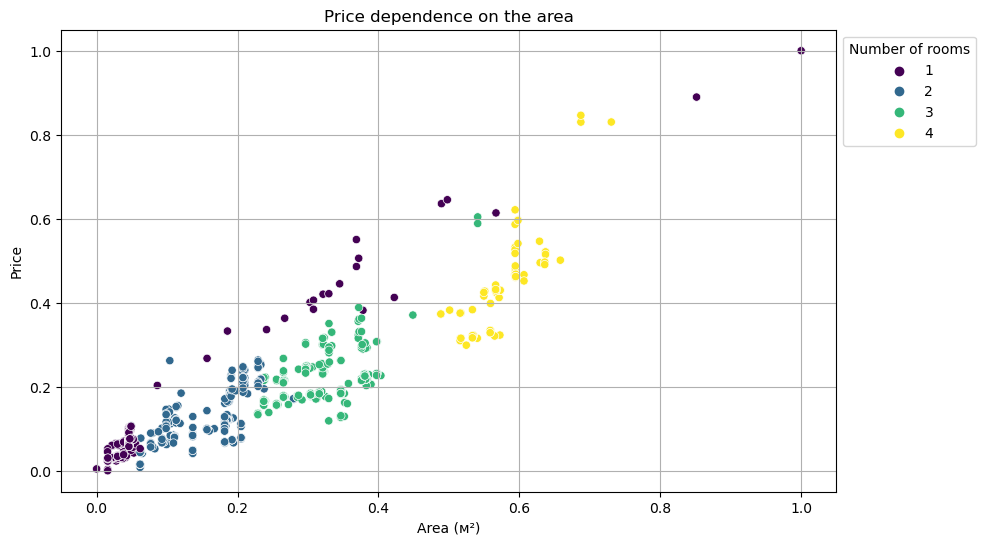

In [137]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = data, x = 'Apartment area', y = 'Price', hue = 'Rooms', palette = 'viridis')
plt.title('Price dependence on the area')
plt.xlabel('Area (м²)')
plt.ylabel('Price')
plt.legend(title = 'Number of rooms', bbox_to_anchor = (1, 1), loc = 'upper left')
plt.grid(True)
plt.show()

In [138]:
data[(apartment_data1['Rooms'] == 1) & (data['Price'] > 0.8)]

,Rooms,Residential complex,City,Address,Apartment area,Price,Price/m2,Year,Commissioned/not commissioned,Material,...,District_Нура район,District_ул. Бухар жырау,District_ул. Т. Рыскулова,District_ул. Туран 57/7,District_ул. Улы дала,HousingClass_Бизнес,HousingClass_Бизнес+,HousingClass_Комфорт,HousingClass_Комфорт+,HousingClass_Эконом
102,1,Jetisu Kerbez Comfort,г. Астана,Unknown,1.000000,1.000000,0.580093,2026,0,Unknown,...,0,0,0,0,1,0,0,1,0,0
436,1,Jetisu Kerbez Comfort,г. Астана,Unknown,0.851482,0.889643,0.614829,2026,0,Unknown,...,0,0,0,0,1,0,0,1,0,0


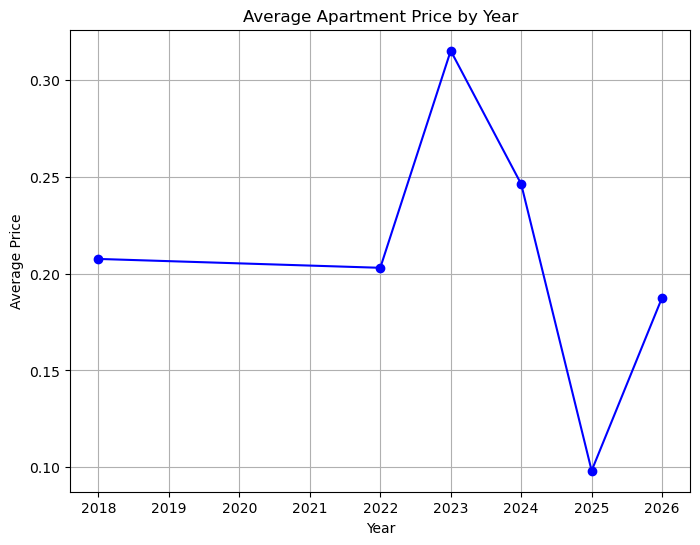

In [139]:
plt.figure(figsize=(8, 6))
data.groupby('Year')['Price'].mean().plot(linestyle = '-', color = 'blue', marker = 'o')
plt.title('Average Apartment Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

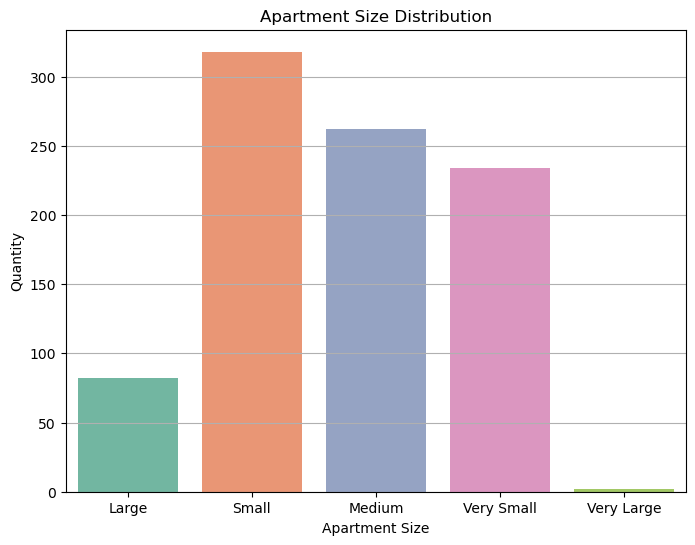

In [140]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Apartment Size Category', data = data, palette = 'Set2')
plt.title('Apartment Size Distribution')
plt.xlabel('Apartment Size')
plt.ylabel('Quantity')
plt.grid(axis = 'y')
plt.show()